<h1>cnn on mnist dataset

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.2330 - acc: 0.9267 - val_loss: 0.0524 - val_acc: 0.9839
Epoch 2/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0779 - acc: 0.9768 - val_loss: 0.0435 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0600 - acc: 0.9822 - val_loss: 0.0293 - val_acc: 0.9899
Epoch 4/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0478 - acc: 0.9855 - val_loss: 0.0248 - val_acc: 0.9908
Epoch 5/12
60000/60000 [===

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=12, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0122 - acc: 0.9962 - val_loss: 0.0198 - val_acc: 0.9953
Epoch 2/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0117 - acc: 0.9965 - val_loss: 0.0197 - val_acc: 0.9944
Epoch 3/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0206 - val_acc: 0.9945
Epoch 4/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0113 - acc: 0.9961 - val_loss: 0.0245 - val_acc: 0.9945
Epoch 5/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0098 - acc: 0.9968 - val_loss: 0.0199 - val_acc: 0.9948
Epoch 6/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0211 - val_acc: 0.9945
Epoch 7/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0089 - acc: 0.9969 - val_loss: 0.0229 - val_acc

Test score: 0.022691776645601566
Test accuracy: 0.9927


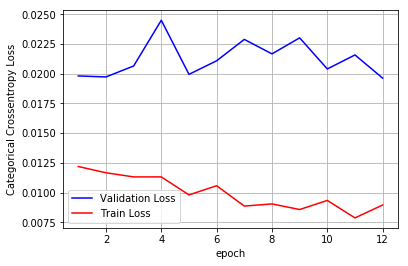

In [0]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,13))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>Three Diff convnets

<h3>M1:Three conv layers-(max-pool,batch-norm,drop-out)

In [0]:

from keras.layers.normalization import BatchNormalization

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

print(model1.summary())

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
__________

Test score: 0.022268649872068273
Test accuracy: 0.9937


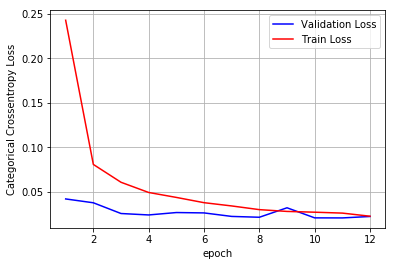

In [0]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,13))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>M2:Five conv layers-(max-pool,drop-out,batch-norm)

In [0]:


model2 = Sequential()
model2.add(Conv2D(8, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Conv2D(16, (5, 5),padding='same', activation='relu'))
model2.add(Conv2D(32, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

print(model2.summary())

model2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history=model2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 16)        3216      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 10, 10, 32)        12832     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 5, 5, 64)          51264     
__________

Test score: 0.024832504260356155
Test accuracy: 0.9932


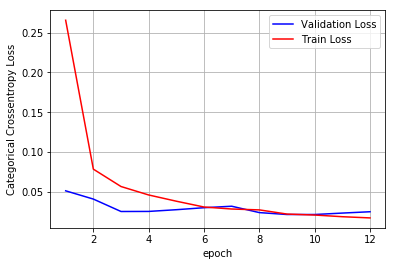

In [0]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,13))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>M3:seven conv layers-(max-pool,drop-out,batch-norm)  kernel 7*7

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(7, 7),padding='same',activation='relu',input_shape=input_shape))
model3.add(Conv2D(32, (7, 7), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (7, 7), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(Conv2D(64, (7, 7), activation='relu',padding='same'))
model3.add(Conv2D(128, (7, 7), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model3.add(Dropout(0.25))
model3.add(Conv2D(128, (7, 7), activation='relu',padding='same'))
model3.add(Conv2D(256, (7, 7), activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

print(model3.summary())

model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

history=model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 32)        50208     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 64)        100416    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 5, 5, 64)          200768    
__________

Test score: 0.025376197105148914
Test accuracy: 0.994


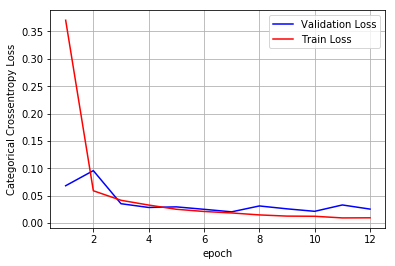

In [0]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,13))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>procedure



    1.Load MNIST dataset
    2.Split the dataset into train and test
    3.Normalize the train and test data
    4.Convert class variable into categorical data vector
    5.Implement Softmax classifier with 3, 5 and 7 conv layers .
    6.Use kernel -size (3X3) , (5X5) and (7,7) .
    7.Draw Categorical Crossentropy Loss VS No.of Epochs plot .



In [0]:
# Creating table using PrettyTable library
from prettytable import PrettyTable

# Names of models
names = ['CNN(3-Conv layers) With Kernel-size = (3,3)','CNN(5-Conv layers) With Kernel-size = (5,5)','CNN(7-Conv layers) With Kernel-size = (7,7)']

# Training accuracies
train_acc = [0.9927,0.9952,0.9976]

# Test accuracies
test_acc = [0.9937,0.9932,0.994]

numbering = [1,2,3]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)
ptable.add_column("Training Accuracy",train_acc)
ptable.add_column("Test Accuracy",test_acc)

# Printing the Table
print(ptable)

+-------+---------------------------------------------+-------------------+---------------+
| S.NO. |                    MODEL                    | Training Accuracy | Test Accuracy |
+-------+---------------------------------------------+-------------------+---------------+
|   1   | CNN(3-Conv layers) With Kernel-size = (3,3) |       0.9927      |     0.9937    |
|   2   | CNN(5-Conv layers) With Kernel-size = (5,5) |       0.9952      |     0.9932    |
|   3   | CNN(7-Conv layers) With Kernel-size = (7,7) |       0.9976      |     0.994     |
+-------+---------------------------------------------+-------------------+---------------+
